# Introduction

The goal of this notebook is to collect California county level crop yield data for high value crops.

References for crop data


*   https://link.springer.com/article/10.1007/s10584-011-0303-6#Tab1
*   https://link.springer.com/content/pdf/10.1007%2Fs10584-006-9141-3.pdf



In [0]:
import pandas as pd
import numpy as np
import requests, json
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

High Value Crops Of Interest


*   Grapes
*   Almonds
*  Strawberries
* Lettuce
* Walnuts
* Tomatoes
* Pistachios

Source: https://www.cdfa.ca.gov/statistics/


Following link takes you to a bunch of PDFs that have county level yield data, but it is in PDF format...
* https://www.nass.usda.gov/Statistics_by_State/California/Publications/AgComm/index.php

In [0]:
#Years of data available
years = list(map(str, np.arange(1980,2018,1)))

#Crop names
crop_names = ['ALMONDS ALL', 'GRAPES WINE',
             'LETTUCE HEAD', 'WALNUTS ENGLISH', 'TOMATOES PROCESSING',
             'PISTACHIOS', 'BERRIES STRAWBERRIES FRESH MARKET']
#Set up df for co
df_list_all = []

#Iterate through years to read all csv files
for y in years:
  
  #csv --> df
  file = y + '08cactb00.csv'
  df = pd.read_csv(file, skipinitialspace = True, dtype = {'Year':float}, 
                   converters={'Crop Name': str.strip, 'County':str.strip})
 
  for crop in crop_names:
    df_crop = df[df['Crop Name'] == crop]

    #Append all dfs together in list
    df_list_all.append(df_crop)

#Concat all dfs together and reset index
df_all = pd.concat(df_list_all)
df_all = df_all.reset_index(drop = True)

#Remove leading and following white space in column labels
df_all.columns = df_all.columns.str.strip()

#Change dtype of certain columns
df_all = df_all.astype({'Year':int, 'Commodity Code':int, 'County Code':int})

#Rename some confusing columns
df_all = df_all.rename(columns = {'Yield':'Yield per Acre', 'Price P/U':'Price per Unit', 
                         'Value':'Total Value'})

#Inspect
df_all.head()

,Year,Commodity Code,Crop Name,County Code,County,Harvested Acres,Yield per Acre,Production,Price per Unit,Unit,Total Value
0,1980,261999,ALMONDS ALL,7,Butte,31468.0,0.42,13217.0,3000.0,TONS,39651000.0
1,1980,261999,ALMONDS ALL,9,Calaveras,NaN,NaN,12.0,3600.0,TONS,43200.0
2,1980,261999,ALMONDS ALL,11,Colusa,14000.0,0.15,2100.0,2800.0,TONS,5880000.0
3,1980,261999,ALMONDS ALL,13,Contra Costa,2990.0,0.19,568.0,1440.0,TONS,818000.0
4,1980,261999,ALMONDS ALL,19,Fresno,23992.0,0.59,14200.0,3000.0,TONS,42600000.0


**Select Column Descriptions**


*   Yield: Tons of crop per acre of land
*   Production: Total tons of crop
* Price per Unit: Price of 1 ton crop in USD
* Total Value: Total price of all tons of crop sold



In [0]:
#Save only the counties
df_counties = df_all[df_all['County Code'] < 900]

#Save the sum of others and state totals
df_others = df_all[df_all['County Code'] > 900]

# Preliminary Analysis



*   How many total observations are there regardless of what county they come from?
*   Do the same counties report every year? How many reports from an individual county?




**Visualize the total number of observations for each crop regardless of what county they come from.**

In [0]:
#Function to plot the number of production observations for each crop

def barplot_observations(crop):
  
  #Filtering to crop of interest
  df_production = df_counties[['Crop Name', 'Year', 'County', 'Production', 'Unit']]
  df_grouped = df_production.groupby(['Crop Name', 'Year']).count().reset_index()
  df_crop = df_grouped[df_grouped['Crop Name'] == crop]
  
  #Plotting bar graph of number of counties reporting data on specific crop
  fig, ax = plt.subplots(figsize = (10,5))
  ax = sns.barplot(x = 'Year', y = 'Production', data = df_crop, color = 'skyblue')
  ax.set_yticks(np.arange(0,df_crop['Production'].max() + 1, 2))
  ax.set_ylabel('Number of Counties Reporting', labelpad = 15)
  
  for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
    
  ax.set_xlabel('Year', labelpad = 15)
  ax.set_title('Counties Reporting ' + str(crop) + ' Production')
  plt.xticks(rotation = 90)

In [0]:
#Crops of interest
crop_names = ['ALMONDS ALL', 'GRAPES WINE',
             'LETTUCE HEAD', 'WALNUTS ENGLISH', 'TOMATOES PROCESSING',
             'PISTACHIOS', 'BERRIES STRAWBERRIES FRESH MARKET']

#Iterate through crops and construct bar plots
for crop in crop_names:
  barplot_observations(crop)

**Next step is to determine if the same counties are reporting for a given crop every year. If mant repeated measurments then we can model individual county yields.**

In [0]:
#Create function to plot the number of observations for specific crop for all years

def county_crop_barplot(crop):
  df_crop = df_counties[df_counties['Crop Name'] == crop]
  df_crop = df_crop.groupby('County').count().sort_values(by = 'Production', ascending = False)

  plt.subplots(figsize = (12,5))
  ax = sns.barplot(x = df_crop.index, y = 'Production', color = 'peachpuff', data = df_crop)
  ax.set_ylabel('Production Observations \n (38 max)', labelpad = 15, fontsize = 15)
  ax.set_xlabel('')
  ax.set_title(crop, fontsize = 18)
  plt.xticks(rotation = 90, fontsize = 14)
  plt.yticks(fontsize = 14)

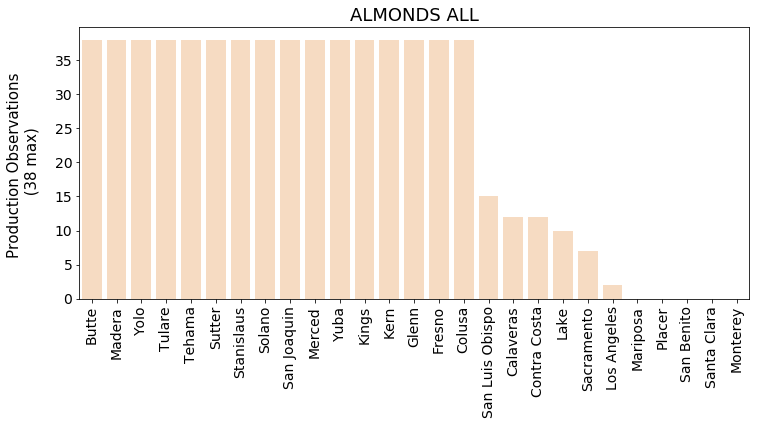

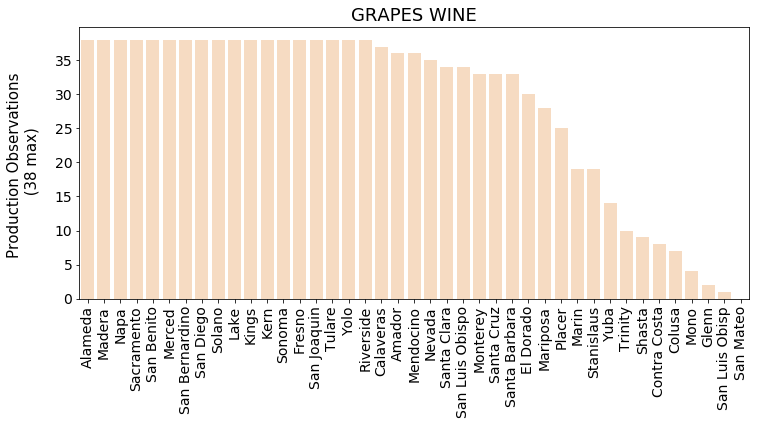

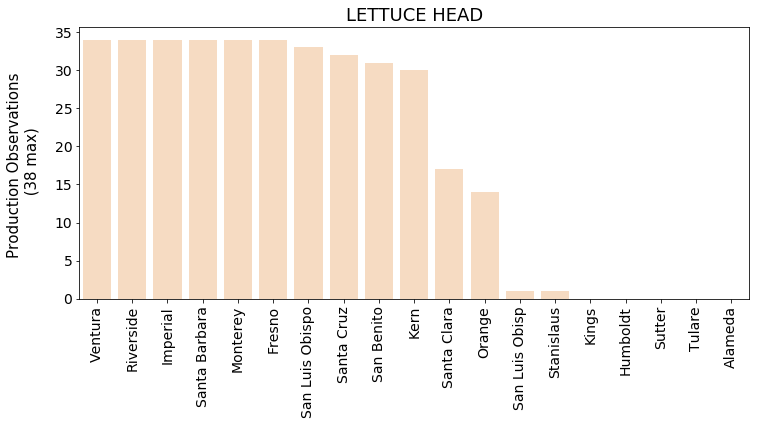

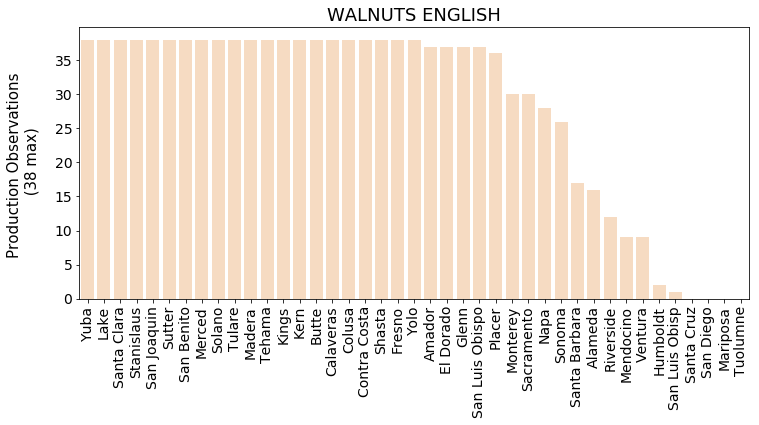

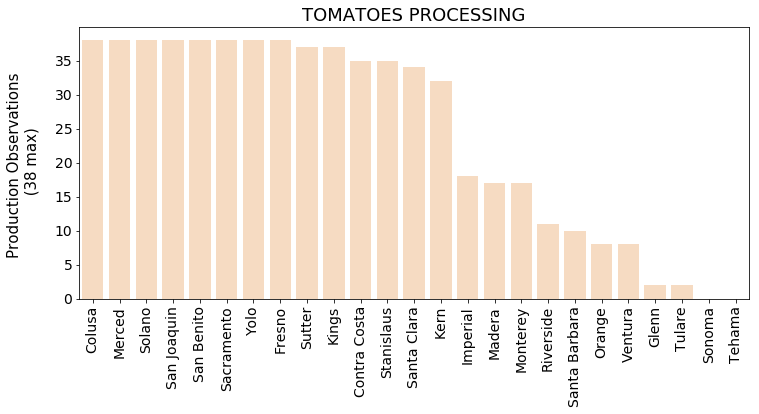

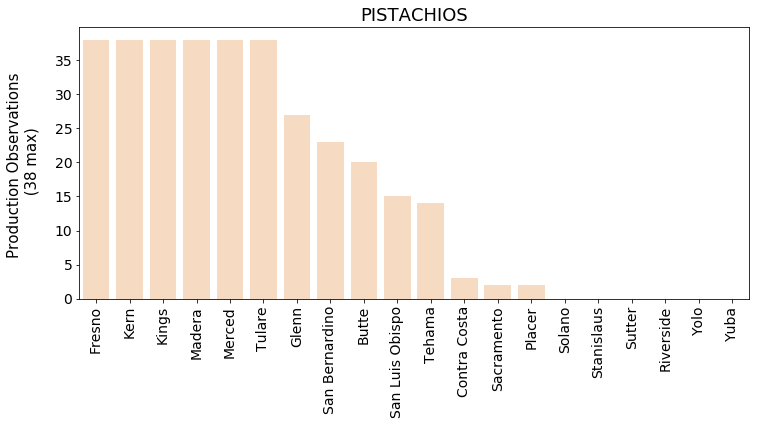

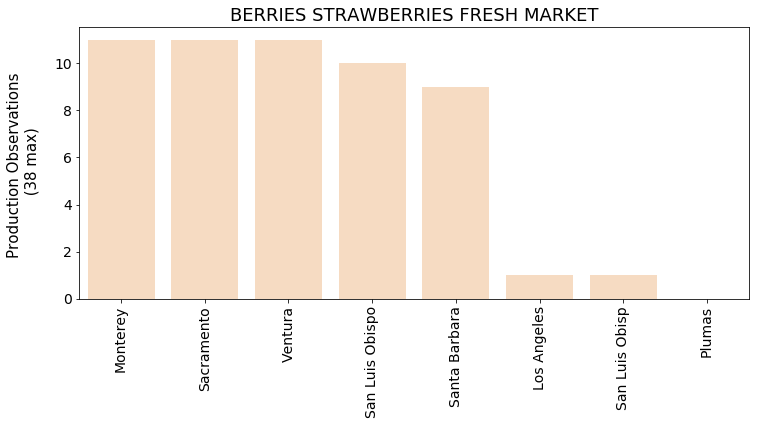

In [0]:
#Crops of interest
crop_names = ['ALMONDS ALL', 'GRAPES WINE',
             'LETTUCE HEAD', 'WALNUTS ENGLISH', 'TOMATOES PROCESSING',
             'PISTACHIOS', 'BERRIES STRAWBERRIES FRESH MARKET']

#Iterate through crops and construct bar plots
for crop in crop_names:
  county_crop_barplot(crop)

In [0]:
df_all['Year'].unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017])